Influence of alpha

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
from src.stats.from_ilp_log import LoggInfo
from src.utils.params_from_path import params_from_pathlog

loginfo=LoggInfo(times=False, counts=False, sizes=False, usrbintime=True)


NSEQS = 50
# DECOMPOSITION = "row_maximal"
NAME = f"{NSEQS}-SARS-CoV-2"
PATH = Path("/data/analysis-paper/paper-experiment-scalability")

COMPLETE = PATH.joinpath(f"sars-cov-2-{NSEQS}-complete")
ROW_MAXIMAL = PATH.joinpath(f"sars-cov-2-{NSEQS}-row_maximal")

PATH_LOG_PGGB = Path("/data/analysis-paper/experiments/pggb/sars-cov-2/logs/")
PATH_LOG_VG   = Path("/data/analysis-paper/experiments/vg/sars-cov-2/logs/")


In [2]:

## Fontsizes plots
FONTSIZE_TITLE = 18
FONTSIZE_SUBTITLE = 16
FONTSIZE_X = 16
FONTSIZE_Y = 16
FONTSIZE_TOOLS = 14 

FONTSIZE_GRID_TITLE = 18
FONTSIZE_GRID_SUBTITLE = 16
FONTSIZE_GRID_X = 16
FONTSIZE_GRID_Y = 16
FONTSIZE_GRID_TOOLS = 14 

LEGEND = True

In [3]:
PATH_SAVE = Path(f"../output-experiment-scalability/sars-cov-2-{NSEQS}/")
PATH_SAVE.mkdir(exist_ok=True, parents=True)

In [3]:
info_pggb = dict()
for path_log in PATH_LOG_PGGB.glob("*err.log"):
    name = path_log.stem.split("-rule")[0]

    info = loginfo(path_log)["usrbintime"][0]
    info["Max RAM (GB)"] = info["Maximum resident set size (kbytes)"] / 1_000_000
    info_pggb[name] = info
info_pggb = info_pggb[NAME]

In [4]:
info_pggb

{'User time (seconds)': 184.05,
 'System time (seconds)': 267.87,
 'Elapsed (wall clock) time (h:mm:ss or m:ss) (seconds)': 61.41,
 'Maximum resident set size (kbytes)': 1245924.0,
 'Max RAM (GB)': 1.245924}

In [5]:
info_vg = dict()
for path_log in PATH_LOG_VG.glob("*err.log"):
    name = path_log.stem.split("-rule")[0]

    info = loginfo(path_log)["usrbintime"][0]
    info["Max RAM (GB)"] = info["Maximum resident set size (kbytes)"] / 1_000_000
    info_vg[name] = info
info_vg = info_vg[NAME]

In [18]:
list_params = []
for log in ROW_MAXIMAL.joinpath("logs").rglob("*.log"):
    if "rule-ilp" in str(log): # and "nodes" in str(log):
        # print(log)
        params = params_from_pathlog(log)     # pangeblocks params
        params.update( loginfo(log)["usrbintime"][0] ) # logging info 
        params["decomposition"] = "row-maximal"
        list_params.append( params)

In [19]:

for log in COMPLETE.joinpath("logs").rglob("*.log"):
    if "rule-ilp" in str(log) and "nodes" in str(log):
        # print(log)
        params = params_from_pathlog(log)     # pangeblocks params
        params.update( loginfo(log)["usrbintime"][0] ) # logging info 
        params["decomposition"] = "complete"
        list_params.append( params)

In [20]:
data = pd.DataFrame(list_params)
data["Max RAM (GB)"] = data["Maximum resident set size (kbytes)"].apply(lambda d: d / 1_000_000)
data["columns"] = data["end"] - data["start"] +1 
data.to_csv(PATH_SAVE.joinpath("usrbintime.tsv"))
data.head()


,name,objective_function,penalization,min_len,min_coverage,start,end,User time (seconds),System time (seconds),Elapsed (wall clock) time (h:mm:ss or m:ss) (seconds),Maximum resident set size (kbytes),decomposition,Max RAM (GB),columns
0,50-SARS-CoV2-MSA,nodes,0,0,0.0,20625,21424,6.22,3.78,6.31,273008.0,row-maximal,0.273008,800
1,50-SARS-CoV2-MSA,nodes,0,0,0.0,20644,21643,11.07,3.83,11.25,516976.0,row-maximal,0.516976,1000
2,50-SARS-CoV2-MSA,nodes,0,0,0.0,25788,26087,1.43,3.55,1.29,79248.0,row-maximal,0.079248,300
3,50-SARS-CoV2-MSA,nodes,0,0,0.0,22471,23070,7.06,3.77,7.18,276124.0,row-maximal,0.276124,600
4,50-SARS-CoV2-MSA,nodes,0,0,0.0,22422,23121,10.76,3.93,11.01,406676.0,row-maximal,0.406676,700


In [21]:
feature = "Max RAM (GB)"
# min and max y-axis values
feat_min = data[feature].min()
feat_max = max(data[feature].max(), info_pggb[feature], info_vg[feature]) 
delta_range = feat_max - feat_min
ymin = feat_min - 0.1*delta_range 
ymax = feat_max + 0.1*delta_range

In [22]:
info_pggb

{'User time (seconds)': 184.05,
 'System time (seconds)': 267.87,
 'Elapsed (wall clock) time (h:mm:ss or m:ss) (seconds)': 61.41,
 'Maximum resident set size (kbytes)': 1245924.0,
 'Max RAM (GB)': 1.245924}

In [23]:
data.head()

,name,objective_function,penalization,min_len,min_coverage,start,end,User time (seconds),System time (seconds),Elapsed (wall clock) time (h:mm:ss or m:ss) (seconds),Maximum resident set size (kbytes),decomposition,Max RAM (GB),columns
0,50-SARS-CoV2-MSA,nodes,0,0,0.0,20625,21424,6.22,3.78,6.31,273008.0,row-maximal,0.273008,800
1,50-SARS-CoV2-MSA,nodes,0,0,0.0,20644,21643,11.07,3.83,11.25,516976.0,row-maximal,0.516976,1000
2,50-SARS-CoV2-MSA,nodes,0,0,0.0,25788,26087,1.43,3.55,1.29,79248.0,row-maximal,0.079248,300
3,50-SARS-CoV2-MSA,nodes,0,0,0.0,22471,23070,7.06,3.77,7.18,276124.0,row-maximal,0.276124,600
4,50-SARS-CoV2-MSA,nodes,0,0,0.0,22422,23121,10.76,3.93,11.01,406676.0,row-maximal,0.406676,700


## RAM

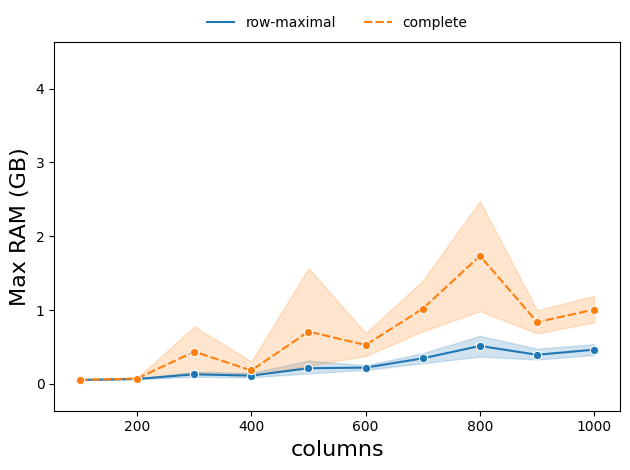

In [32]:
g_ram = sns.lineplot(
    data=data, 
    x="columns", y=feature, 
    hue="decomposition", 
    style="decomposition", 
    marker="o",
    )# hue_order=OBJ_FUNCTIONS)
# g_ram.text(x=0.5, y=1.1, s=f'{NAME} | Potential seeds of length 15 w.r.t. {chr(945)}', fontsize=FONTSIZE_TITLE, weight='bold', ha='center', va='bottom', transform=g_ram.transAxes)
# g_potential_seeds.text(x=0.5, y=1.05, s=f'Complete vs Row-maximal decomposition | not-{chr(945)}-consistent', fontsize=FONTSIZE_SUBTITLE, alpha=0.75, ha='center', va='bottom', transform=g_potential_seeds.transAxes)
g_ram.set_xlabel(f"columns", fontsize=FONTSIZE_X)
g_ram.set_ylabel("Max RAM (GB)", fontsize=FONTSIZE_Y)
g_ram.set_ylim([ymin,ymax])

sns.move_legend(
    g_ram, "lower center",
    bbox_to_anchor=(.5, 1), ncol=5, title="", frameon=False,
)

g_ram.figure.tight_layout()
g_ram.get_figure().savefig(PATH_SAVE.joinpath(f"{NAME}-ilp-instances-RAM.png"),dpi=300)

## User Time

In [33]:
feature = "User time (seconds)"
# min and max y-axis values
feat_min = data[feature].min()
feat_max = max(data[feature].max(), info_pggb[feature], info_vg[feature]) 
delta_range = feat_max - feat_min
ymin = feat_min - 0.1*delta_range 
ymax = feat_max + 0.1*delta_range

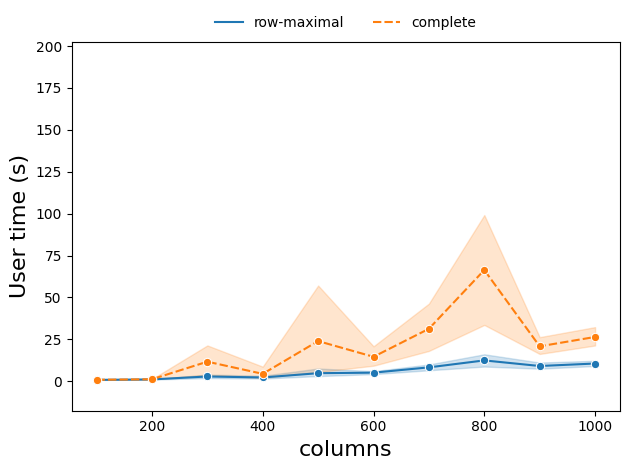

In [34]:
g_ram = sns.lineplot(
    data=data, 
    x="columns", y=feature, 
    hue="decomposition", 
    style="decomposition", 
    marker="o",
    )# hue_order=OBJ_FUNCTIONS)
# g_ram.text(x=0.5, y=1.1, s=f'{NAME} | Potential seeds of length 15 w.r.t. {chr(945)}', fontsize=FONTSIZE_TITLE, weight='bold', ha='center', va='bottom', transform=g_ram.transAxes)
# g_potential_seeds.text(x=0.5, y=1.05, s=f'Complete vs Row-maximal decomposition | not-{chr(945)}-consistent', fontsize=FONTSIZE_SUBTITLE, alpha=0.75, ha='center', va='bottom', transform=g_potential_seeds.transAxes)
g_ram.set_xlabel(f"columns", fontsize=FONTSIZE_X)
g_ram.set_ylabel("User time (s)", fontsize=FONTSIZE_Y)
g_ram.set_ylim([ymin,ymax])

sns.move_legend(
    g_ram, "lower center",
    bbox_to_anchor=(.5, 1), ncol=5, title="", frameon=False,
)

g_ram.figure.tight_layout()
g_ram.get_figure().savefig(PATH_SAVE.joinpath(f"{NAME}-ilp-instances-User_time.png"),dpi=300)